# Navigation Task

In [1]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som_position import ManagerSOMPosition, ManagerSOMPositionAllNeighbor
from custom_env.navigation_task import NavigationTask
%matplotlib inline

path exception


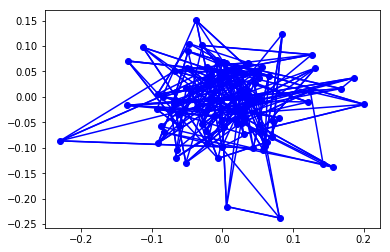

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


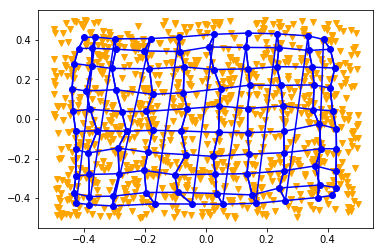

tensor([[-0.3992,  0.4121],
        [-0.4184,  0.3557],
        [-0.4325,  0.2799],
        [-0.4398,  0.1525],
        [-0.4366,  0.0392],
        [-0.4275, -0.0625],
        [-0.4263, -0.1542],
        [-0.4273, -0.2900],
        [-0.4341, -0.3739],
        [-0.4253, -0.4247],
        [-0.3627,  0.4138],
        [-0.3738,  0.3571],
        [-0.3754,  0.2685],
        [-0.3930,  0.1413],
        [-0.3805,  0.0486],
        [-0.3568, -0.0598],
        [-0.3859, -0.1719],
        [-0.3829, -0.2803],
        [-0.3838, -0.3922],
        [-0.3830, -0.4327],
        [-0.2997,  0.4045],
        [-0.2950,  0.3524],
        [-0.3093,  0.2555],
        [-0.2959,  0.1477],
        [-0.2766,  0.0376],
        [-0.2606, -0.0620],
        [-0.2887, -0.1469],
        [-0.2849, -0.2767],
        [-0.3045, -0.3900],
        [-0.3054, -0.4396],
        [-0.1817,  0.4061],
        [-0.2017,  0.3437],
        [-0.1853,  0.2534],
        [-0.1753,  0.1248],
        [-0.1953,  0.0382],
        [-0.1750, -0

In [2]:
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

## Manager Self Organizing Map

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


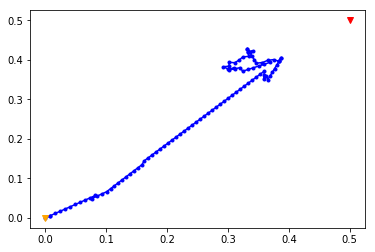

99 26.412142479428173


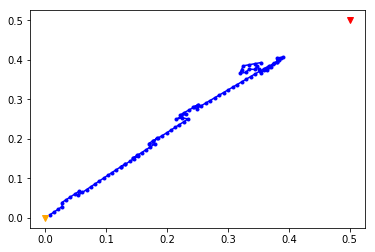

199 28.85347433454189


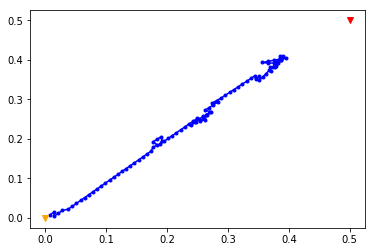

299 28.692380823173586


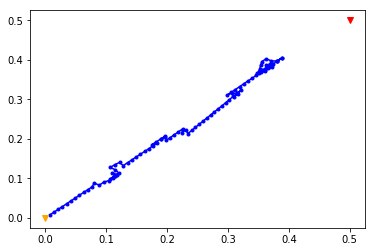

399 29.113594355646114


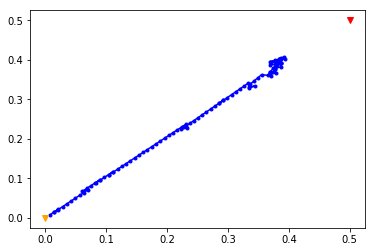

499 27.393784030610966


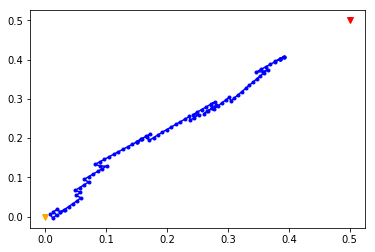

599 24.33219429015956


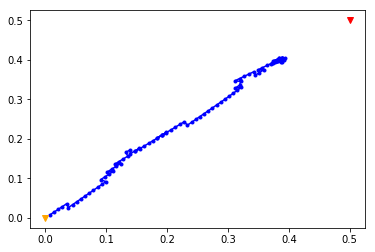

699 28.746459267110964


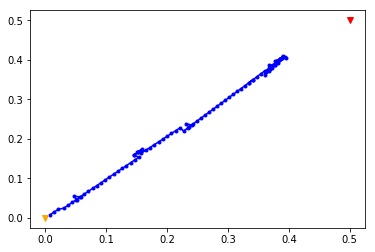

799 28.221241353695007


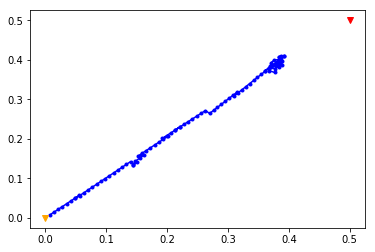

899 29.257146116836232


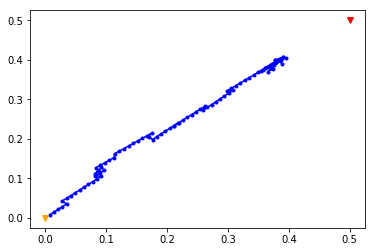

999 28.647369616121114


In [3]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTask()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
        plt.show()
        print(epoch, total_return)
    
    task.reset()

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


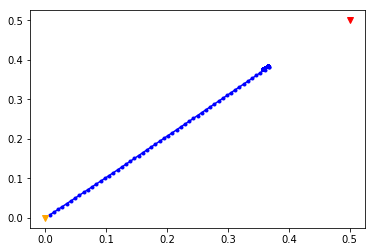

31.19635542612377


In [4]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


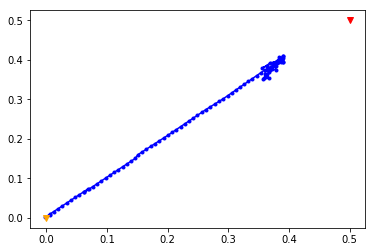

99 27.67202632660703


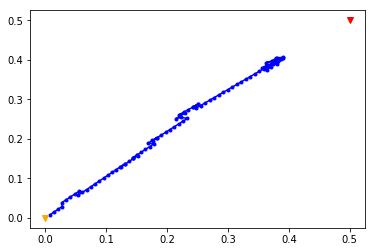

199 28.838849870412886


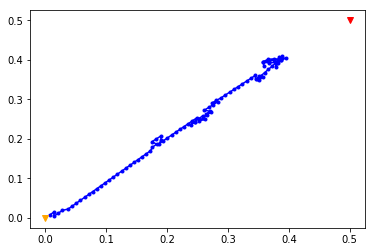

299 28.635660476056824


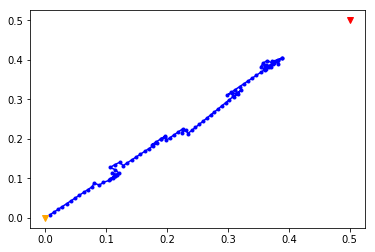

399 29.10558002068239


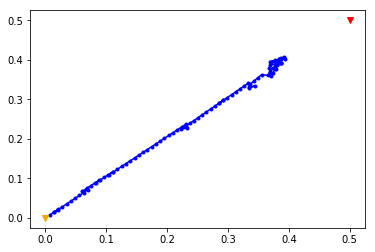

499 27.38257004885962


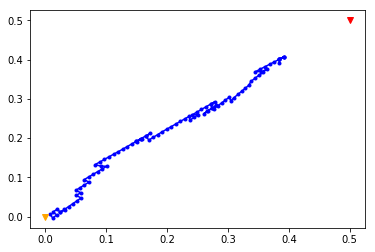

599 24.349464659099887


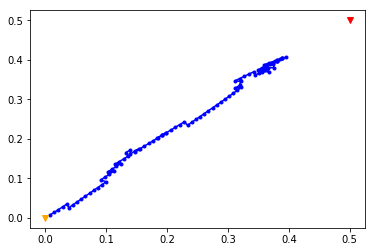

699 28.673854062427665


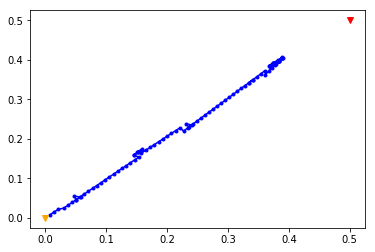

799 28.208023460503348


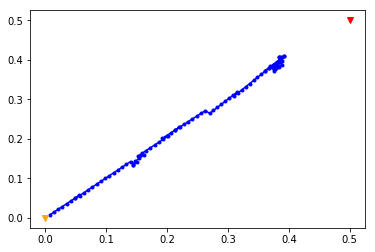

899 29.246341951765768


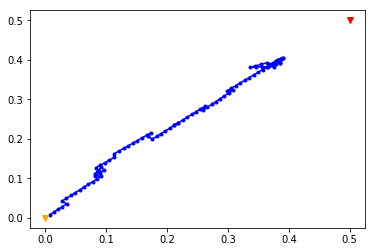

999 28.645371658036243


In [5]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPositionAllNeighbor(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTask()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
        plt.show()
        print(epoch, total_return)
    
    task.reset()

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


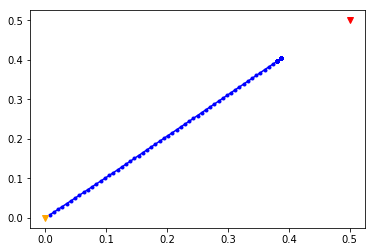

31.2046592794247


In [6]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()